 **Nombre de los integrantes:**

\

* **Integrante 1:** Angie Tatiana Hidalgo Araque \\
* **Integrante 2:** Lili Johanna Gallego Arias \\
* **Integrante 3:** Sebastián Restrepo Betancur \\
* **Integrante 4:** Andres Felipe Patiño

<center>
    <img src="https://blogs.elespectador.com/wp-content/uploads/2017/09/logo-Universidad-Nacional.png" width="500" alt="logo" />
</center>

#Prevención del Acceso a Dispositivos y Aplicaciones de Menores de Edad#

**Definición del problema**

La sociedad en su constante crecimiento tecnológico ha llevado a que cada vez más las generaciones tengan a la mano un dispositivo tecnológico sin importar el rango de edad que tengan, esto con el fin de buscar un mejor desarrollo personal o simplemente para entretenimiento.

Sin embargo, en un mundo donde la tecnología está en las manos de cualquier persona se debe contar con un sistema de regulación y/o autorización un poco más exigente (en comparación con los formularios típicos, controles parentales, extensiones de bloqueo, etc, presenten en cierta páginas o aplicaciones), esto debido a que como se mencionó anteriormente, los jóvenes tiene la capacidad de entrar a contenidos que no están diseñados para ellos o que simplemente son para personas mayores de cierta edad.

En 30 paises mas de un tercio de los jovenes reportaron sufrir de ciber-acoso y de estos 1 de cada 5 no asiste a clases por esto. Ademas en 25 paises el 80% de los jovenes reporto haber sufrido ciber-acoso o explotacion en linea.

Una alternativa de solución a la problemática anteriormente descrita es la detección de edad facial, puesto que esta se puede emplear para prevenir el acceso no autorizado a dispositivos electrónicos, aplicaciones móviles o servicios en línea donde se sometería al usuario a una detección de edad facial como requisito para acceder a una página web o aplicación. Si el sistema detecta que el usuario es menor de edad o no tiene la edad adecuada, se le niega el acceso, de tal forma que la aplicación de control parental utilice la detección de edad facial para garantizar que los niños o jóvenes no puedan acceder a contenido inapropiado.

Esta alternativa que se plantea se realizará con un sistema de visión artificial el cual se implementará en las páginas y/ o aplicaciones y cuyo fin será el de restringir la entrada al sitio tal como se describe anteriormente, sometiendo al usuario a una detección facial; dicho sistema se entrenará con un dataset el cual en un inicio contará con imágenes de personas de diferentes edades, desde 1 hasta los 110 años de edad.




**Fuente del dataset**

 https://www.kaggle.com/datasets/frabbisw/facial-age

**Preguntas a resolver**

* ¿Es posible clasificar a una persona entre mayor de edad y menor de edad desde el analisis de imagen?
* ¿Es efectivo el sistema en la prevención del acceso no autorizado para menores de edad a contenido inapropiado?

**Metricas de desempeño**


| **Modelo** | **Accuracy** | **Precisión**| **Recall** | **f1-score**|
|-------------------|----------------||-------------------|----------------|
| CNN      |  0.50|0.50|0.47|0.48|
| CNN 2      |  - | - | - | - |
| Regresión logistica con LBP| 0.58 |0.61|0.58|0.59|
| SVM con LBP       |0.59|0.60|0.62|0.61|
| Regresión logistica con HOG| 0.91|0.92|0.91|0.92|
| SVM con HOG|0.91|0.91|0.92|0.91|

## Bibliotecas necesarias:


El siguiente código parte de código necesaria para la solución del problema hace referencia al llamado de las mismas librerias:

In [ ]:
# @title
from keras.utils import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import os
import seaborn as sns
from skimage import feature, io
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog
import random
import itertools
from shutil import copyfile, rmtree
from pathlib import Path
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow_hub as hub
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
import shutil
from google.colab import drive
drive.mount('/content/drive')
from sklearn.metrics import confusion_matrix
# Funciones necesarias:
edad='001'
def ver_muestras_imagenes(edad, number_of_images):
    plt.figure(figsize=(5,5))
    plt.figure(figsize=(10,6))
    age_folder = directorio + '/'+ edad
    images = os.listdir(age_folder)[:number_of_images]
    for i in range(number_of_images):
        file = plt.imread(age_folder +'/'+ images[i])
        plt.subplot(number_of_images,2,i+1)
        plt.imshow(file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Análisis descriptivo y exploratorio:

El siguiente código hace referencia al llamado de las librerias necesarias, primero vemos como estan distribuidos el dataset:

In [ ]:
# @title
# directorio de imagenes
# sebas
directorio = '/content/drive/MyDrive/Vision_por_computador/Datos/face_age'
nombres_carpetas=[]
for Archivo in os.listdir(directorio):
    nombres_carpetas+=[Archivo]
print('Las edades son las siguientes:')
print('--------------------------------------------------------------')
print('-'.join(nombres_carpetas))
print(len(nombres_carpetas))

Las edades son las siguientes:
--------------------------------------------------------------
006-002-009-007-003-010-008-004-005-001-015-011-018-016-012-019-017-013-014-020-029-028-021-023-030-027-025-024-022-026-034-033-032-031-039-035-040-037-036-038-046-043-044-041-047-048-045-049-050-042-053-057-054-059-056-060-055-051-052-058-070-066-063-067-062-068-065-069-064-061-079-080-078-073-072-075-077-071-076-074-089-088-085-082-086-083-081-087-090-084-face_age-101-093-092-099-110-096-091-095-100
100


Creamos una función que ilustre algunas de las carpetas de nuestra base de datos, en ella vemos la distribución de los mismos datos, en este caso las población de 4 años de edad:

<Figure size 500x500 with 0 Axes>

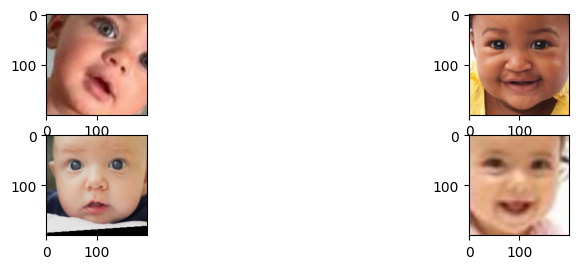

In [ ]:
# @title
ver_muestras_imagenes(edad, 4)

## Imagenes en escala de grises y escaladas

La siguiente es una vizualización de las imagenes de entrenamiento de algunas imagenes en escalas de grises de las personas menores de 18 años, estas poseen información reescalada de las mismas imagenes

### Personas menores de edad:

A continuación se ven las imagenes de los datos de personas *menores* de edad

(0.0, 1.0000000000000002)


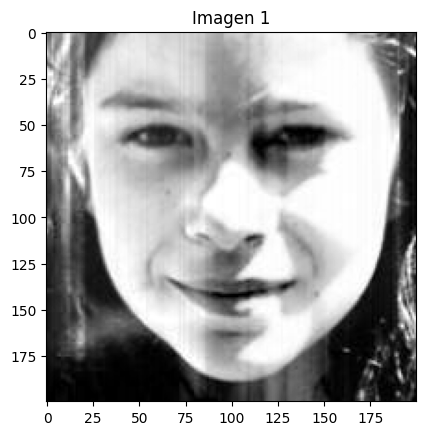

(0.0, 1.0000000000000004)


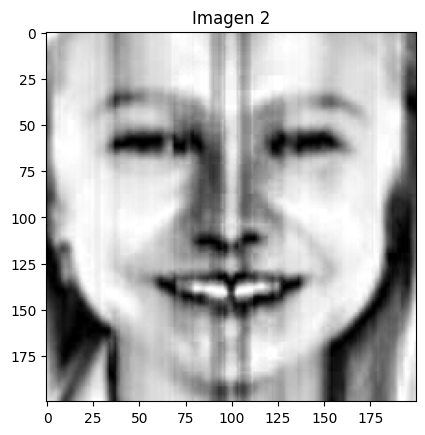

(0.0, 1.0000000000000002)


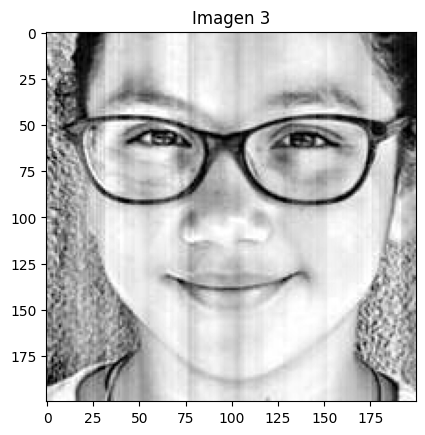

(0.0, 1.0000000000000002)


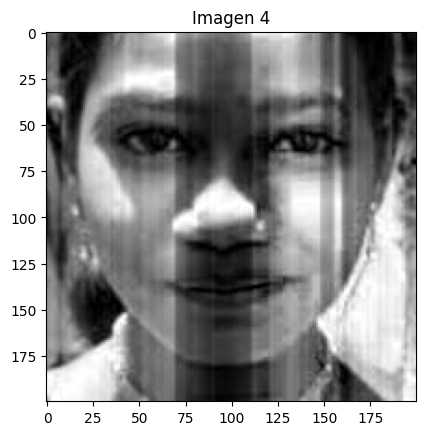

In [ ]:
# @title
edad='014'
# Lista de archivos en la carpeta
archivos = os.listdir(directorio+ '/'+ edad)
imagenes = [archivo for archivo in archivos if archivo.endswith(('.jpg', '.png', '.bmp'))]
num_filas = 2
num_columnas = 3
num_imagenes_a_mostrar = num_filas * num_columnas


scaler = MinMaxScaler()

for i, imagen_nombre in enumerate(imagenes[0:4]):
    imagen_path = os.path.join(directorio+ '/'+ edad, imagen_nombre)
    imagen = Image.open(imagen_path).convert('L')
    imagen_array = (scaler.fit_transform(imagen))
    print((imagen_array.min(), imagen_array.max()))
    plt.figure()
    plt.imshow(imagen_array, cmap='gray')
    plt.title(f'Imagen {i + 1}')
    plt.axis('on')
    plt.show()

## Personas mayores de edad:

A continuación se ven las imagenes de los datos de personas ***mayores*** de edad:

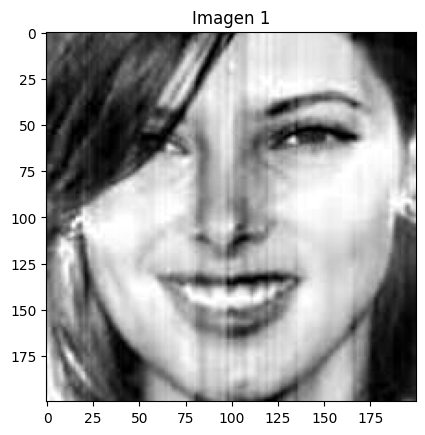

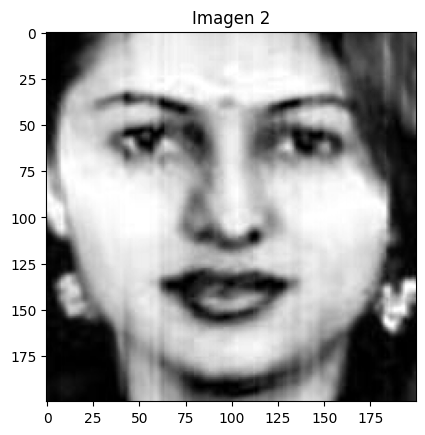

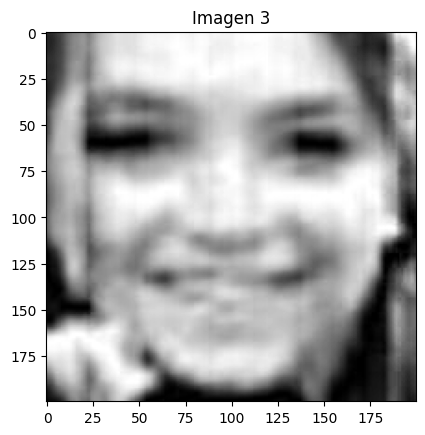

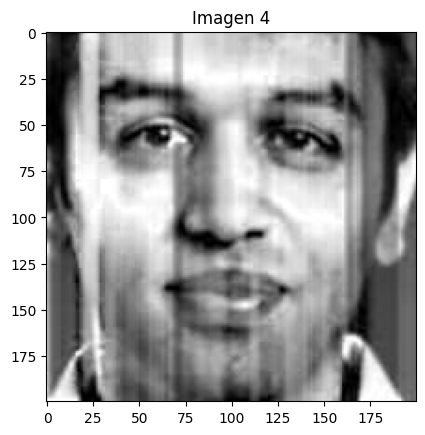

In [ ]:
# @title
edad='028'
# Lista de archivos en la carpeta
archivos = os.listdir(directorio+ '/'+ edad)

# Filtra los archivos para asegurarte de que sean imágenes (puedes agregar más extensiones si es necesario)
imagenes = [archivo for archivo in archivos if archivo.endswith(('.jpg', '.png', '.bmp'))]

scaler = MinMaxScaler()

for i, imagen_nombre in enumerate(imagenes[0:4]):
    imagen_path = os.path.join(directorio+ '/'+ edad, imagen_nombre)
    imagen = Image.open(imagen_path).convert('L')
    imagen_array = (scaler.fit_transform(imagen))
    plt.figure()
    plt.imshow(imagen_array, cmap='gray')
    plt.title(f'Imagen {i + 1}')
    plt.axis('on')
    plt.show()

# Estructuración de la información:

Primero es importante saber cuantas imagenes se tienen para posteriormente hacer la redistribución de las mismas:

In [ ]:
# @title
from numpy.core import numeric

def contar_archivos_en_carpeta(lista_archivos):
  # Contar los archivos en la lista
    try:
        cantidad_archivos = len(lista_archivos)
        return cantidad_archivos
    except OSError:
        return "Error: No se pudo acceder a la carpeta"

archivos=os.listdir('/content/drive/MyDrive/Vision_por_computador/Datos/face_age')
archivos.remove('face_age')
archivos=np.sort(archivos)
for i in archivos:
  carpeta = os.listdir(directorio+ '/'+ i)
  resultado = contar_archivos_en_carpeta(carpeta)
  if isinstance(resultado, int):
      print(f"En la carpeta de {int(i)} año de edad hay {resultado} archivos.")
      print('-------------------------------------------------')
  else:
      print(resultado)


En la carpeta de 1 año de edad hay 1112 archivos.
-------------------------------------------------
En la carpeta de 2 año de edad hay 475 archivos.
-------------------------------------------------
En la carpeta de 3 año de edad hay 284 archivos.
-------------------------------------------------
En la carpeta de 4 año de edad hay 260 archivos.
-------------------------------------------------
En la carpeta de 5 año de edad hay 180 archivos.
-------------------------------------------------
En la carpeta de 6 año de edad hay 114 archivos.
-------------------------------------------------
En la carpeta de 7 año de edad hay 126 archivos.
-------------------------------------------------
En la carpeta de 8 año de edad hay 236 archivos.
-------------------------------------------------
En la carpeta de 9 año de edad hay 159 archivos.
-------------------------------------------------
En la carpeta de 10 año de edad hay 140 archivos.
-------------------------------------------------
En la ca

Se analiza cuantos de esos son menores de edad y mayores de edad, para después llegar a una conclusión de como se distribuira el dataset se hara especial enfásis en los más pequeños porque el foco de este trabajo es la prevención de algún contenido pesado para los mismos.

----------------------------------------------------
* **Menores de edad:** en general quedara distribuido en dos poblaciones haciendo especial enfasis en la primera, donde las personas de primera infancia se esperara ocupar un 30% del mismo que son personas entre 2 y 11 años, y la segunda de adoslescensia de 12 a 18 años con un total del 20%.

<center>

| **Rango de edad** | **Porcentaje** |
|-------------------|----------------|
| **(2-11]**        | 30%            |
| **(11-18]**       | 20%            |

</center>

* **Mayores de edad:** se distribuiran en rangos de 10 años sobre un 10% del dataset de la siguiente manera:

<center>

| **Rango de edad** | **Porcentaje** |
|:-----------------:|:--------------:|
| **(18-28]**       | 10%            |
| **(28-38]**       | 10%            |
| **(38-48]**       | 10%            |
| **(48-58]**       | 10%            |
| **(58-68]**       | 10%            |

</center>


In [ ]:
# @title
archivos=os.listdir('/content/drive/MyDrive/Vision_por_computador/Datos/face_age')
archivos.remove('face_age')
archivos.remove('001')
archivos=np.sort(archivos)
suma=0
lista=['011','018','028','038','048','058','068']
j=0
print('DISTRIBUCIÓN - REETIQUETADO DATASET')
print('-------------------------------------------------')
for i in archivos:
  carpeta = os.listdir(directorio+ '/'+ i)
  resultado = contar_archivos_en_carpeta(carpeta)
  suma+=resultado
  if i in lista:
    if i=='011':
      lista.insert(0,'002')
    if isinstance(resultado, int):
        print(f"En los rangos de edad entre {int(lista[j])} y {int(lista[j+1])} años de edad hay {suma} archivos.")
        print('-------------------------------------------------')
        j+=1
        suma=0
    else:
        print(resultado)
  if j==7:
    print(f'Los de primera infancia se cogeran {1400} imagenes que sera un 30%')
    print(f'Los de adolescensia se cogeran {int(1400*20/30)} imagenes que sera un 20%')
    print(f'Los mayores de edad se cogeran {int(1400*10/30)} imagenes que sera un 10% por cada rango de edad')
    print('-------------------------------------------------')
    print('BASE_MODELO=4663 imagenes, 2330 personas mayores de edad y otras 2333 menores de edad')
    print('-------------------------------------------------')
    print(f'DATASET DE TRAIN={int(4663*0.7)} imagenes, la mitad {int(4663*0.7)*0.5} mayores y la otra mitad {int(4663*0.7)*0.5} menores de edad cogiendo {int(int(4663*0.7)*0.5*0.6)+1} \nentre 2 y 11, la otra parte entre {int(int(4663*0.7)*0.5*0.4)} entre 11 y 18 años')
    print('-------------------------------------------------')
    print(f'DATASET DE TEST={int(4663*0.2)} imagenes, la mitad {int(4663*0.2)*0.5} mayores y la otra mitad {int(4663*0.2)*0.5} menores de edad cogiendo {int(int(4663*0.2)*0.5*0.6)+1} \nentre 2 y 11, la otra parte entre {int(int(4663*0.2)*0.5*0.4)} entre 11 y 18 años')
    print('-------------------------------------------------')
    print(f'DATASET DE VALID={int(4663*0.1)+1} imagenes,la mitad {int(4663*0.1)*0.5+1} mayores y la otra mitad {int(4663*0.1)*0.5} menores de edad cogiendo {int(int(4663*0.1)*0.5*0.6)+1} \nentre 2 y 11, la otra parte entre {int(int(4663*0.1)*0.5*0.4)} entre 11 y 18 años')
    print('-------------------------------------------------')
    break

DISTRIBUCIÓN DATASET
-------------------------------------------------
En los rangos de edad entre 2 y 11 años de edad hay 2087 archivos.
-------------------------------------------------
En los rangos de edad entre 11 y 18 años de edad hay 957 archivos.
-------------------------------------------------
En los rangos de edad entre 18 y 28 años de edad hay 1425 archivos.
-------------------------------------------------
En los rangos de edad entre 28 y 38 años de edad hay 1048 archivos.
-------------------------------------------------
En los rangos de edad entre 38 y 48 años de edad hay 712 archivos.
-------------------------------------------------
En los rangos de edad entre 48 y 58 años de edad hay 978 archivos.
-------------------------------------------------
En los rangos de edad entre 58 y 68 años de edad hay 670 archivos.
-------------------------------------------------
Los de primera infancia se cogeran 1400 imagenes que sera un 30%
Los de adolescensia se cogeran 933 imagenes

## Entrenamiento de modelos:

Se pasan las carpetas de archivos a validación de modelos:

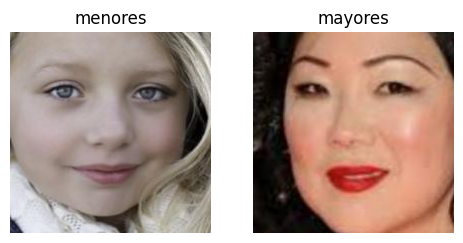

In [ ]:
# @title
# Let's plot a few images
train_path = "/content/drive/MyDrive/Vision_por_computador/modelo_de_datos/Train"
validation_path = "/content/drive/MyDrive/Vision_por_computador/modelo_de_datos/Valid"
test_path = "/content/drive/MyDrive/Vision_por_computador/modelo_de_datos/Test"

image_categories = os.listdir('/content/drive/MyDrive/Vision_por_computador/modelo_de_datos/Train')

def plot_images(image_categories):

    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):

        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0


        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')

    plt.show()

# Call the function
plot_images(image_categories)


Vemos como nos quedo los datos de entrenamiento,prueba y validación, Se mencionan las 2 clases:

In [ ]:
# @title

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Crear generadores de datos para train, valid y test
train_generator = train_datagen.flow_from_directory(
    train_path,       # Ruta a la carpeta de entrenamiento
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary' # Clasificación binaria (menores y mayores de edad)
)

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
    validation_path,       # Ruta a la carpeta de validación
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary' # Clasificación binaria (menores y mayores de edad)
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,        # Ruta a la carpeta de prueba
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary' # Clasificación binaria (menores y mayores de edad)
)

Found 3292 images belonging to 2 classes.
Found 467 images belonging to 2 classes.
Found 932 images belonging to 2 classes.


Hacemos la respectiva distinción del mismo archivo

In [ ]:
# @title
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_generator.class_indices.items()])
print(class_map)

{0: 'mayores', 1: 'menores'}


Hacemos una red CNN:

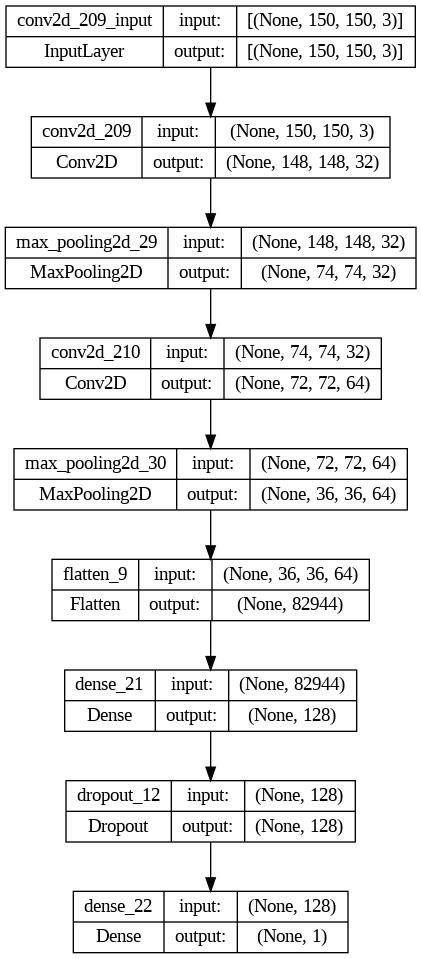

In [ ]:
# @title
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Entrenamos la red neuronal con 20 epochs:

In [ ]:
# @title
# Entrenar el modelo: No correr muy demorado
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    epochs=20
)

Epoch 1/20
102/102 [==============================] - 423s 4s/step - loss: 0.8164 - accuracy: 0.5178 - val_loss: 0.6897 - val_accuracy: 0.5670
Epoch 2/20
102/102 [==============================] - 166s 2s/step - loss: 0.6876 - accuracy: 0.5752 - val_loss: 0.6556 - val_accuracy: 0.6272
Epoch 3/20
102/102 [==============================] - 169s 2s/step - loss: 0.6666 - accuracy: 0.6101 - val_loss: 0.6533 - val_accuracy: 0.6473
Epoch 4/20
102/102 [==============================] - 178s 2s/step - loss: 0.6489 - accuracy: 0.6377 - val_loss: 0.6188 - val_accuracy: 0.6696
Epoch 5/20
102/102 [==============================] - 171s 2s/step - loss: 0.6322 - accuracy: 0.6601 - val_loss: 0.5621 - val_accuracy: 0.7188
Epoch 6/20
102/102 [==============================] - 177s 2s/step - loss: 0.6134 - accuracy: 0.6739 - val_loss: 0.5998 - val_accuracy: 0.6942
Epoch 7/20
102/102 [==============================] - 174s 2s/step - loss: 0.6013 - accuracy: 0.6739 - val_loss: 0.5788 - val_accuracy: 0.7165

Por último validacmos el gráfico de errores y presición para las 20 epocchs

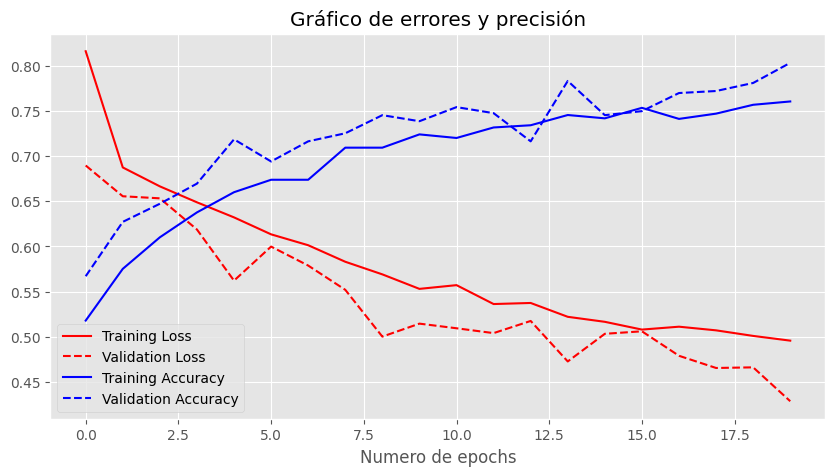

In [ ]:
# @title
# Plot the error and accuracy
h = history.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Gráfico de errores y precisión')
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Numero de epochs")
plt.legend(loc='best')
plt.show()

In [ ]:
# @title
model.evaluate(test_generator)

30/30 [==============================] - 179s 6s/step - loss: 0.4221 - accuracy: 0.8026


[0.42206165194511414, 0.8025751113891602]

Validamos como esta prediciendo el modelo

1/1 [==============================] - 0s 189ms/step


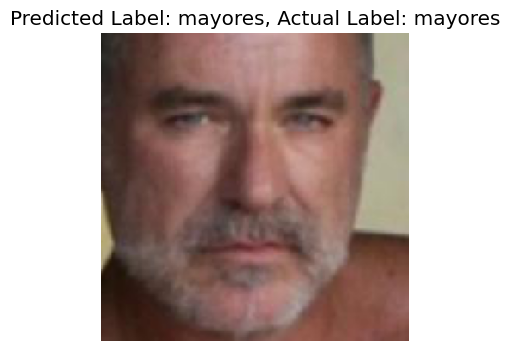

In [ ]:
# @title
# Cargamos la imagen de prueba que no esta en el entrenamiento
test_image_path = '/content/drive/MyDrive/Vision_por_computador/Datos/face_age/052/1025.png'

def generate_predictions(test_image_path, actual_label):
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='mayores')

Curva roc para el primer modelo sobre metricas de error

30/30 [==============================] - 59s 2s/step


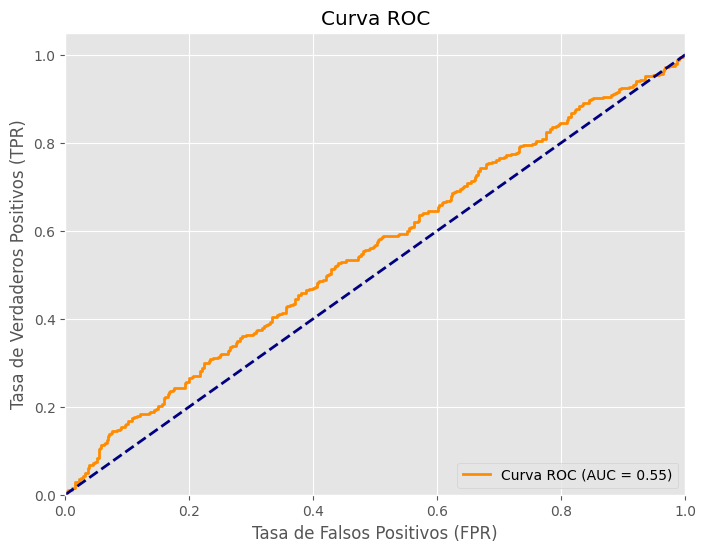

Precisión: 53.43%
Precisión (positivos verdaderos / (positivos verdaderos + falsos positivos)): 0.54
Recall (positivos verdaderos / (positivos verdaderos + falsos negativos)): 0.47
F1-Score: 0.50
Matriz de Confusión:
[[280 186]
 [248 218]]


In [ ]:
# @title

y_pred_prob = model.predict(test_generator)


y_true = test_generator.classes

fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calcular métricas de rendimiento adicionales
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir probabilidades en etiquetas binarias

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred)

---
## Segundo modelo:

Inception model(Modelo preentrenado)

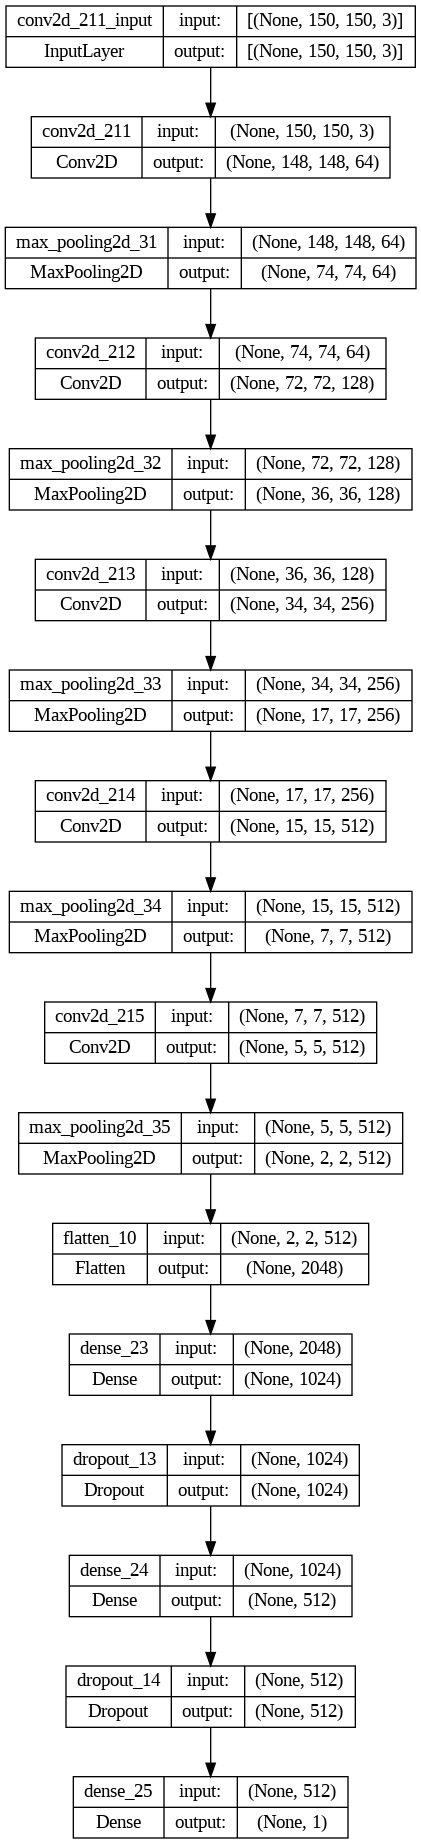

In [ ]:
# @title
model = Sequential()


model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
root_dir = "/content/drive/MyDrive/Vision_por_computador/Datos/face_age"
#base_dir = root_dir + 'universidad/visionporcomputador/Semana 7/'
print("base_dir is: " + root_dir)

---
# Tercer modelo: #
**Regresion logistica con LBP**

- Clasificador LBP (Local Binary Patterns)

In [ ]:
dataset_root = "/content/drive/MyDrive/Vision_por_computador/modelo_de_datos"


# Parámetros para el algoritmo LBP
radius = 1
n_points = 8 * radius
METHOD = 'uniform'

# Lista para almacenar las características LBP y etiquetas
features = []
labels = []

# Inicializa un codificador de etiquetas para las etiquetas de clase
label_encoder = LabelEncoder()

# Itera a través de las carpetas
for split in ["Train", "Test", "Valid"]:
    for label in ["mayores", "menores"]:
        folder_path = os.path.join(dataset_root, split, label)
        for filename in os.listdir(folder_path):
            # Carga la imagen en escala de grises
            img_path = os.path.join(folder_path, filename)
            img = io.imread(img_path, as_gray=True)

            # Calcula el LBP
            lbp = feature.local_binary_pattern(img, n_points, radius, method=METHOD)

            # Histogama del LBP
            lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
            lbp_hist = lbp_hist.astype("float")
            lbp_hist /= (lbp_hist.sum() + 1e-6)

            # Agrega las características y etiquetas a las listas
            features.append(lbp_hist)
            labels.append(label)

# Convierte las listas en matrices NumPy
features = np.array(features)
labels = label_encoder.fit_transform(labels)

# Ahora, features contiene las características LBP y labels contiene las etiquetas correspondientes

- **Regresion Logistica**

In [ ]:
# Supongamos que 'X' es tu matriz de características LBP y 'y' son las etiquetas
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Inicializa y entrena el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)
# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Precisión del modelo: {accuracy}")
print(f"Reporte de clasificación:\n{report}")

Precisión del modelo: 0.5921192758253461
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       489
           1       0.57      0.60      0.58       450

    accuracy                           0.59       939
   macro avg       0.59      0.59      0.59       939
weighted avg       0.59      0.59      0.59       939



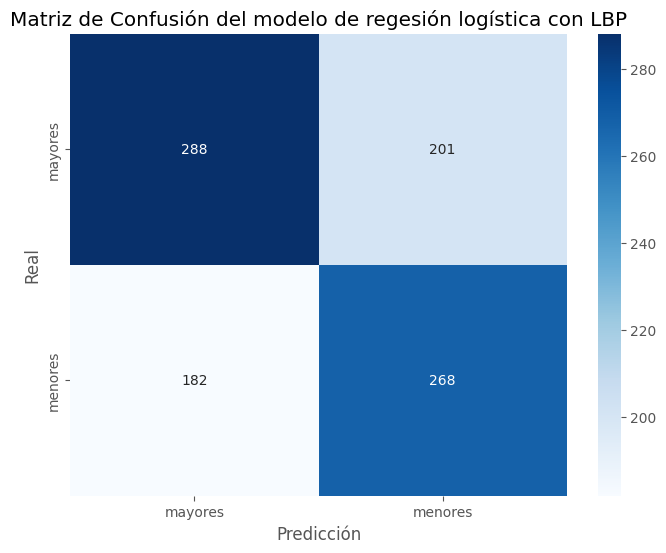

In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crea un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',  xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión del modelo de regesión logística con LBP')
plt.show()

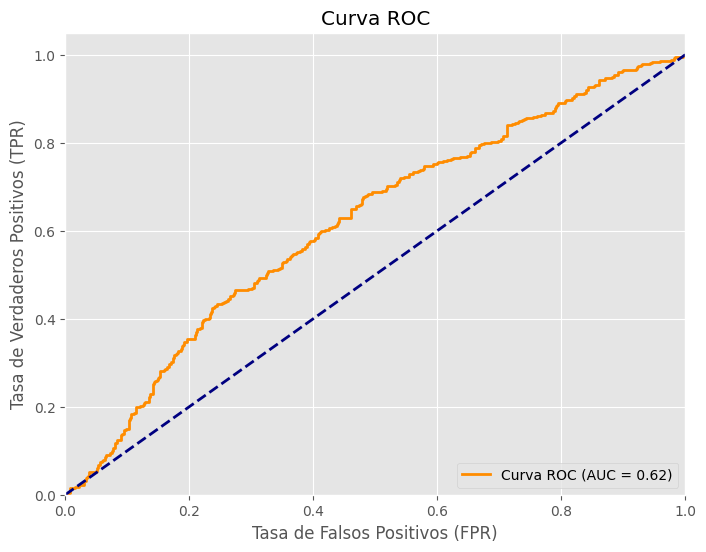

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtén las probabilidades de predicción en lugar de las etiquetas binarias
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva (mayores)

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Dibuja la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


---
# Cuarto modelo: #

- **SVM (Support Vector Machine)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
from sklearn.svm import SVC

# Inicializa el modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Entrena el modelo en los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Precisión del modelo SVM: {accuracy}")
print(f"Reporte de clasificación:\n{report}")

Precisión del modelo SVM: 0.5889243876464324
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       489
           1       0.57      0.55      0.56       450

    accuracy                           0.59       939
   macro avg       0.59      0.59      0.59       939
weighted avg       0.59      0.59      0.59       939



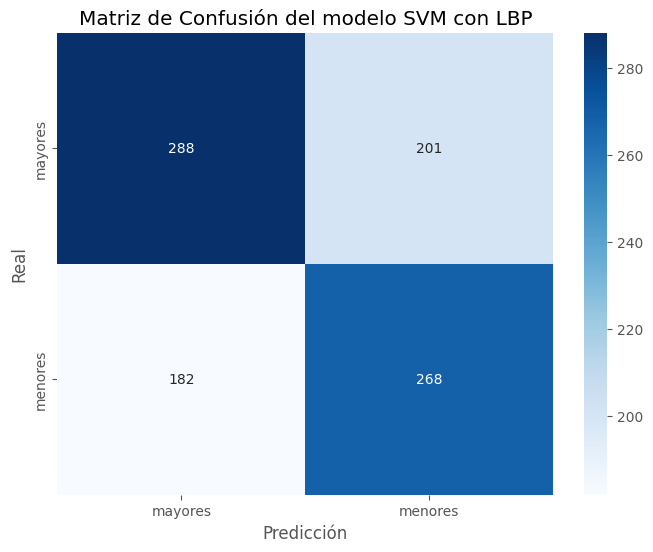

In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crea un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión del modelo SVM con LBP')
plt.show()

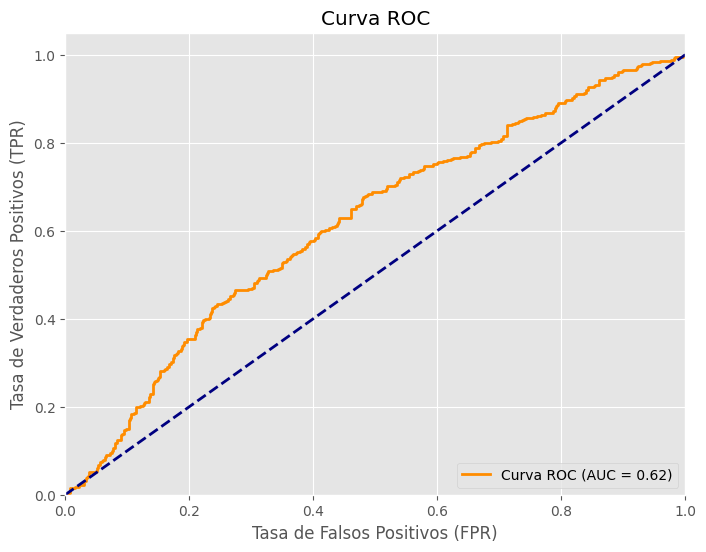

In [ ]:
# Obtén las probabilidades de predicción en lugar de las etiquetas binarias
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva (mayores)

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Dibuja la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

---
# Quinto modelo: #

- **Clasificador HOG (Histograms of oriented gradients)**

In [ ]:
 dataset_root = "/content/drive/MyDrive/Vision_por_computador/modelo_de_datos"
 # Parámetros para HOG
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# Listas para almacenar las características HOG y etiquetas
features_hog = []
labels = []

# Inicializa un codificador de etiquetas para las etiquetas de clase
label_encoder = LabelEncoder()

# Itera a través de las carpetas
for split in ["Train", "Test", "Valid"]:
    for label in ["mayores", "menores"]:
        folder_path = os.path.join(dataset_root, split, label)
        for filename in os.listdir(folder_path):
            # Carga la imagen en escala de grises
            img_path = os.path.join(folder_path, filename)
            img = io.imread(img_path, as_gray=True)

            # Calcula las características HOG
            hog_features = hog(img, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block)

            # Agrega las características HOG y etiquetas a las listas
            features_hog.append(hog_features)
            labels.append(label)

# Convierte las listas en matrices NumPy
features_hog = np.array(features_hog)
labels = label_encoder.fit_transform(labels)

- **Regesión logistica**

In [ ]:
modelo = LogisticRegression(solver='lbfgs', max_iter=400)

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_hog, labels, test_size=0.2, random_state=42)

# Inicializa y entrena el modelo de regresión logística
logistic_model = modelo
logistic_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Evalúa el rendimiento del modelo de regresión logística con características HOG
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Precisión del modelo de regresión logística con HOG: {accuracy}")
print(f"Reporte de clasificación:\n{report}")

Precisión del modelo de regresión logística con HOG: 0.9020234291799787
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       489
           1       0.88      0.92      0.90       450

    accuracy                           0.90       939
   macro avg       0.90      0.90      0.90       939
weighted avg       0.90      0.90      0.90       939



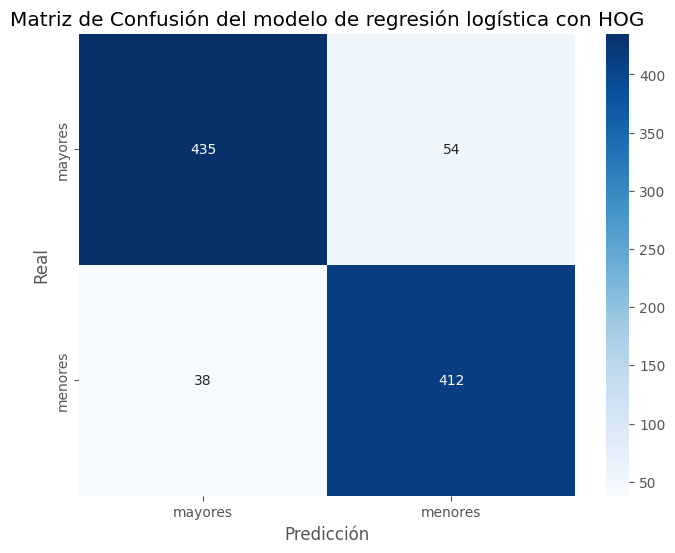

In [ ]:
# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Crea un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión del modelo de regresión logística con HOG')
plt.show()

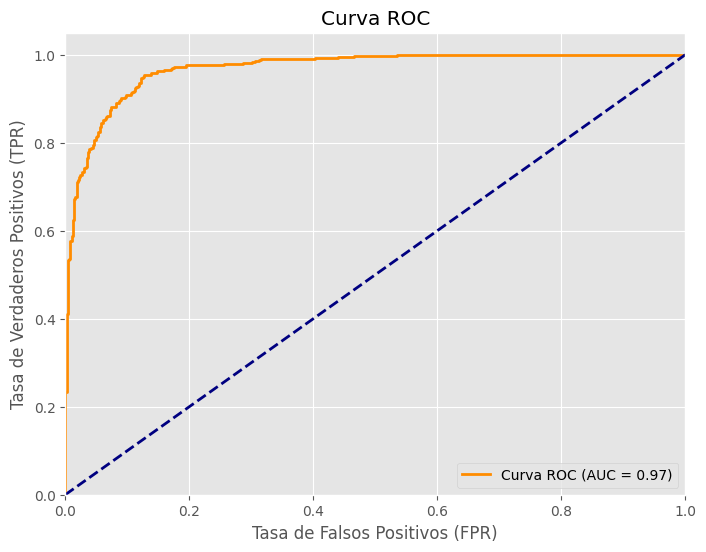

In [ ]:
# Obtén las probabilidades de predicción en lugar de las etiquetas binarias
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Dibuja la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

---
# Sexto modelo: #
- **SVM (Support Vector Machine)**

In [ ]:
# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_hog, labels, test_size=0.2, random_state=42)

# Inicializa y entrena el modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Evalúa el rendimiento del modelo SVM con características HOG
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Precisión del modelo SVM con HOG: {accuracy}")
print(f"Reporte de clasificación:\n{report}")

Precisión del modelo SVM con HOG: 0.9041533546325878
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       489
           1       0.89      0.91      0.90       450

    accuracy                           0.90       939
   macro avg       0.90      0.90      0.90       939
weighted avg       0.90      0.90      0.90       939



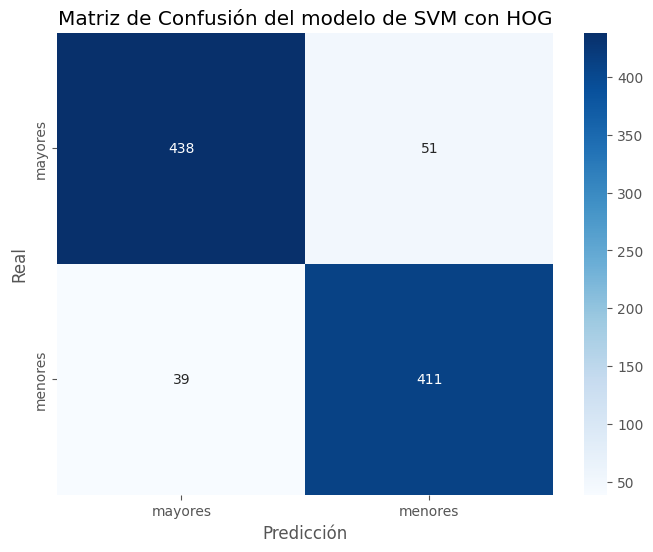

In [ ]:
# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Crea un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión del modelo de SVM con HOG')
plt.show()

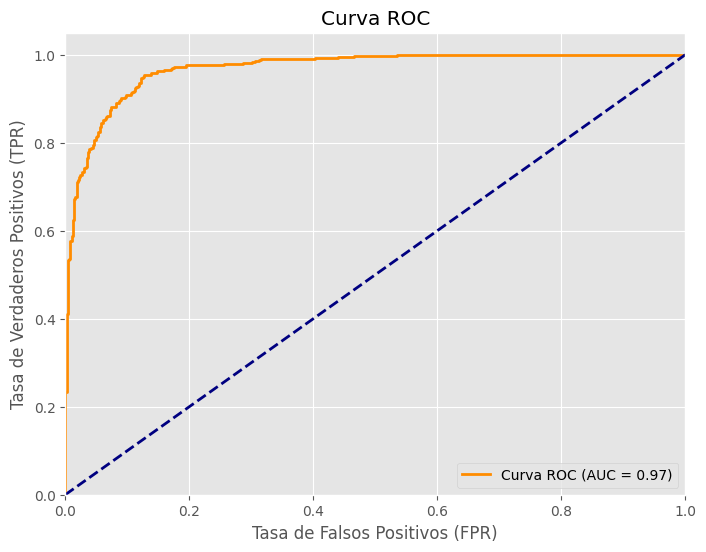

In [ ]:
# Obtén las probabilidades de predicción en lugar de las etiquetas binarias
#y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva (mayores)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Dibuja la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

---
**Resultados**
* Al evaluar diversas métricas (Accuracy, Recall, F1-score y Precisión), se observó que el modelo que arrojó los resultados más satisfactorios fue el modelo de SVM con HOG.
* Se logro evidenciar que los modelos más básicos obtuvieron mejores métricas en comparación con la red CNN.

---
**Limitantes**

* Limitaciones con relación a aspectos legales frente a regulaciones locales e internacionales y en relación a temas éticos.
* Limitaciones computacionales con relación a la capacidad de modelos que se puede correr sin licencias de pago.
* Limitaciones respecto a la escalabilidad dado las condiciones en las que se encuentra el dataset pues esta en un ambiente controlado, donde las imagenes ya son rostros especificamente por lo que no hay ruido y no hay que hacer una ventana delizante la cual detecte los rotros.

---
**Posibles Mejoras**
* Implementación de modelos más sofisticados, que posiblemente pueden dar mejores métricas frente a los implementados.
* Utilización de un dataset que no este en un entorno tan controlado.
* Podría considerar la óptimización de los modelos utilizados

---
**Concluciones**

* Se logra concluir que no siempre es requerido la implementación de modelos muy sofisticados para obtener buenos resultados, pues en terminos de optimización generalmente son más rápidos los modelos más básicos en comparación con los más complejos.

* La capacidad de preveer  si un menor de edad esta accediendo a contenido restringido para su edad se ha vuelto posible, gracias a la recopilación y análisis de datos provenientes de imagenes los cuales son procesados por un clasificador y un modelo previamente entrenado.